Import libraries numpy and matplotlib.pyplot

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Import functions from functions folder

In [ ]:
from Functions.KMeans import split_channels
from Functions.KMeans import init_centroids
from Functions.KMeans import euclidean_distance_3d
from Functions.KMeans import assign_to_centroids
from Functions.KMeans import update_centroids
from Functions.KMeans import elbow_method
from Functions.KMeans import plot_elbow_method
from Functions.KMeans import find_elbow

Load and save images
Show image as test 

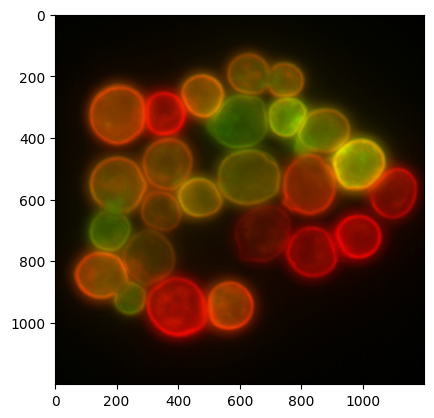

In [5]:
YeastCells = np.copy(plt.imread('Original_Images/Clustering/Data/Yeast_Cells.jpg'))
plt.imshow(YeastCells)

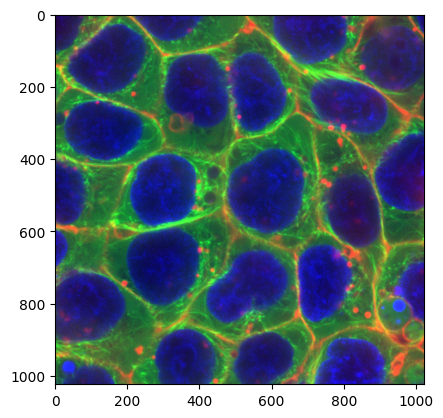

In [6]:
CellNuclei = np.copy(plt.imread('Original_Images/Clustering/Data/Cell_Nuclei.tif'))
plt.imshow(CellNuclei)

Test if loading split_channels worked

In [7]:
R, G, B = split_channels(YeastCells)

R

array([2, 2, 5, ..., 2, 2, 1], shape=(1440000,), dtype=uint8)

Pick k random centroids

In [8]:
centroids = init_centroids(5)
centroids


array([[0.63512473, 0.43798761, 0.47585591],
       [0.42818888, 0.93223697, 0.11231601],
       [0.71600611, 0.11175384, 0.21265024],
       [0.01114684, 0.58213448, 0.49319325],
       [0.86358093, 0.55510653, 0.2111587 ]])

Euclidean distance test

In [9]:
euclidean_distance_3d(centroids[1,],[5,])

euclidean_distance_3d([0,0,0], [0,1,0])

np.float64(1.0)

In [10]:
pixels = CellNuclei.reshape(-1, 3)
assign_to_centroids(pixels, centroids)

array([0, 0, 0, ..., 0, 0, 0], shape=(1048576,))

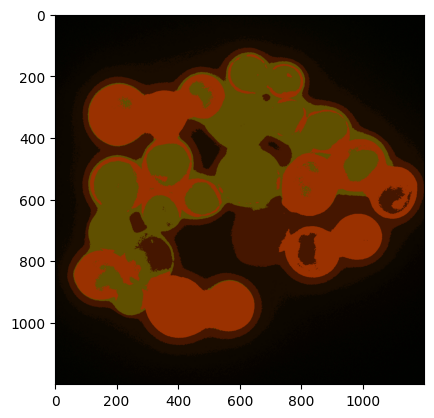

In [21]:
def kmeans_clusteringRGB(image, k, max_iterations=100):
    """
    Perform K-means clustering on a 3D image.

    Parameters:
    - image: 3D numpy array representing the image.
    - k: Number of clusters.
    - max_iterations: Maximum number of iterations for convergence.

    Returns:
    - segmented_image: 3D numpy array with clustered pixel values.
    """
    # Reshape Image
    reshaped_image = image.reshape(-1, 3)

    # Initialize centroids
    centroids = init_centroids(k)

    for _ in range(max_iterations):
        # Assign pixels to the nearest centroid
        labels = assign_to_centroids(reshaped_image, centroids)

        # Update centroids based on the assigned pixels
        new_centroids = update_centroids(reshaped_image, labels, k)

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    # Create segmented image based on final labels
    labels_2d = labels.reshape(image.shape[0], image.shape[1])
    segmented_image = np.zeros_like(image)
    for i in range(k):
        segmented_image[labels_2d == i] = centroids[i]

    return segmented_image


clustered_YeastCells = kmeans_clusteringRGB(YeastCells, 10, max_iterations=10)

plt.imshow(clustered_YeastCells)

Calculate WCSS

In [11]:
WCSS = elbow_method(CellNuclei, 10)

Plot k against WCSS

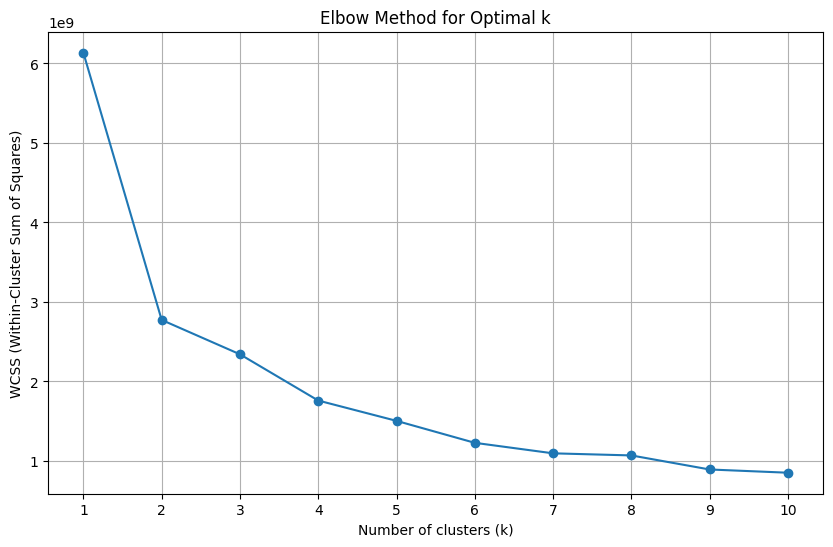

In [ ]:
plot_elbow_method(WCSS)

Identify elbow

In [ ]:
ideal_k = find_elbow(WCSS)

ideal_k

np.int64(2)